In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import time, datetime
pd.set_option('display.max_rows', 101)
!date

Thu Mar 19 10:27:20 PDT 2020


# Aggregate and plot outputs of over under sim

launch code at /share/code/beatrixh/microsim_2020/census_2020/dp_small_v_large/launch_small_v_large_jobs.py
sim code at /share/code/beatrixh/microsim_2020/census_2020/dp_small_v_large/dp_small_v_large_counties.py

Idea: when there is one area with n counties, and some large proportion of those counties have small populations, then when noise is added, only those counties with small populations will go negative. When the nonneg optimization is run over all counties, the ones that have gone negative will shift up to zero, and everything else will come down to balance out the total count. on average, the small counties will have shifted downwards more than the larger counties.

In [39]:
def summarize_dir(path):
    """
    Parameter: input dir containing csvs
    ---------
    Output: 1-column df containing the row means of the concatenated csvs
    """
    files = os.listdir(path)
    output = pd.DataFrame(np.zeros([11,1]))
    for file in files:
        df = pd.read_csv(path + '/' + file, index_col=False)
        df = df.iloc[:,1:]
        output = pd.concat([output,df], axis=1, ignore_index=True)
    return output.mean(axis=1)

In [91]:
# get dt with one col per sim setting
dirs = os.listdir('/ihme/scratch/users/beatrixh/2020-03-19/nonne/')
dirs = ['/ihme/scratch/users/beatrixh/2020-03-18/nonne/' + i for i in dirs]
dt = pd.DataFrame()
for path in dirs:
    new = summarize_dir(path)
    dt = pd.concat([dt, new], axis = 1, ignore_index=True)

In [77]:
metadata = pd.DataFrame(['99q','precise_over','precise_under','dp_over','dp_under','non-neg_over','non-neg_under','pct_change_over','pct_change_under','pct_change_minmaj','number of most detailed areas',
        'alpha','beta','total_pop_count','prop_minority','segregation_factor',
        'seed'])

In [92]:
under_dt = dt.T
under_dt.columns = metadata[0]
under_dt

,99q,precise_over,precise_under,dp_over,dp_under,non-neg_over,non-neg_under,pct_change_over,pct_change_under,pct_change_minmaj,number of most detailed areas,alpha,beta,total_pop_count,prop_minority,segregation_factor,seed
0,382.229431,8.906543e+04,6.023980e+04,8.905667e+04,6.021521e+04,8.780049e+04,6.150474e+04,0.014303,-0.021123,0.032099,9990.00999,0.2,10.0,3.000000e+06,0.05,1.0,450.0
1,12081.370919,2.818244e+06,1.909402e+06,2.818248e+06,1.909339e+06,2.817432e+06,1.910213e+06,0.000290,-0.000427,0.000897,9990.00999,0.2,10.0,9.486833e+07,0.05,1.0,450.0
2,1207.772517,2.817871e+05,1.908015e+05,2.817876e+05,1.907670e+05,2.807163e+05,1.918723e+05,0.003824,-0.005644,0.009884,9990.00999,0.2,10.0,9.486833e+06,0.05,1.0,450.0
3,3.809560,8.350599e+02,5.179970e+02,8.452448e+02,4.662258e+02,4.740370e+01,1.305653e+03,0.942998,-1.537366,0.887322,9990.00999,0.2,10.0,3.000000e+04,0.05,1.0,450.0
4,38.200430,8.857689e+03,5.917307e+03,8.854474e+03,5.892866e+03,7.009381e+03,7.765615e+03,0.210074,-0.314415,0.276768,9990.00999,0.2,10.0,3.000000e+05,0.05,1.0,450.0
5,120.863207,2.812948e+04,1.896250e+04,2.812761e+04,1.894196e+04,2.662150e+04,2.047049e+04,0.053982,-0.080000,0.098797,9990.00999,0.2,10.0,9.486833e+05,0.05,1.0,450.0
6,12.045005,2.764610e+03,1.801006e+03,2.768676e+03,1.758146e+03,1.000977e+03,3.564640e+03,0.640462,-0.984577,0.618800,9990.00999,0.2,10.0,9.486833e+04,0.05,1.0,450.0
7,3820.424565,8.911431e+05,6.036781e+05,8.911440e+05,6.036347e+05,8.902147e+05,6.046065e+05,0.001049,-0.001547,0.003001,9990.00999,0.2,10.0,3.000000e+07,0.05,1.0,450.0
8,0.000000,6.985315e+01,0.000000e+00,7.797403e+01,-4.992607e+01,3.935959e-01,6.945965e+01,0.993446,-inf,0.931037,9990.00999,0.2,10.0,3.000000e+03,0.05,1.0,450.0
9,0.999021,2.473097e+02,1.115614e+02,2.531139e+02,6.395205e+01,3.772372e+00,3.550989e+02,0.983882,-2.202226,0.921817,9990.00999,0.2,10.0,9.486833e+03,0.05,1.0,450.0


in the above: each row is the aggregation of 1000 sims. the county sizes for the sims came from a beta distribution. \
'99q' is the 99th quartile of county size. \
\
'precise_over' is the total number of people living in counties of size greater than 99q; 'precise_under' is the total number of people living in counties of size leq 99q. \
\
'dp_over' are those counties from 'precise_over', with noise added. 'dp_under are the counties from 'dp_under' with noise added.\
\
same logic for non-neg_over, non-neg_under. \
\
as we increase total_pop_count, we see the bias reducing.

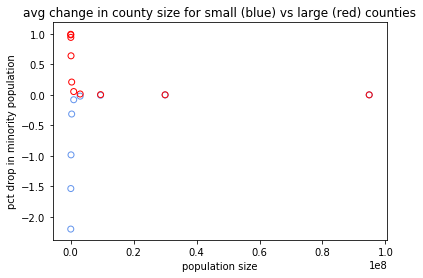

In [87]:
x = under_dt['total_pop_count']
y = under_dt['pct_change_under']
z = under_dt['pct_change_over']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.scatter(x, z, facecolors='none', edgecolors = 'red')

plt.title("avg change in county size for small (blue) vs large (red) counties")
plt.xlabel('population size')
plt.ylabel('pct drop in minority population')

plt.show()

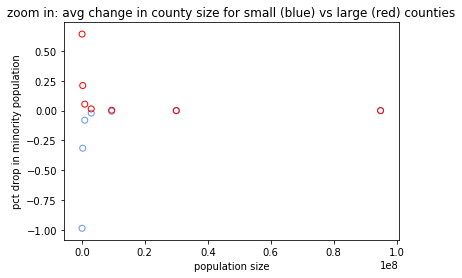

In [89]:
x = under_dt[under_dt.total_pop_count>3e4]['total_pop_count']
y = under_dt[under_dt.total_pop_count>3e4]['pct_change_under']
z = under_dt[under_dt.total_pop_count>3e4]['pct_change_over']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.scatter(x, z, facecolors='none', edgecolors = 'red')

plt.title("zoom in: avg change in county size for small (blue) vs large (red) counties")
plt.xlabel('population size')
plt.ylabel('pct drop in minority population')

plt.show()

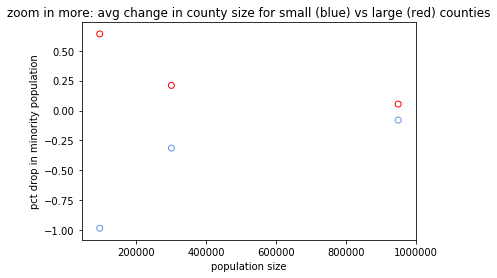

In [93]:
x = under_dt[(under_dt.total_pop_count>3e4) & (under_dt.total_pop_count<3e6)]['total_pop_count']
y = under_dt[(under_dt.total_pop_count>3e4) & (under_dt.total_pop_count<3e6)]['pct_change_under']
z = under_dt[(under_dt.total_pop_count>3e4) & (under_dt.total_pop_count<3e6)]['pct_change_over']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.scatter(x, z, facecolors='none', edgecolors = 'red')

plt.title("zoom in more: avg change in county size for small (blue) vs large (red) counties")
plt.xlabel('population size')
plt.ylabel('pct drop in minority population')

plt.show()